In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

Text(0.5, 1.0, 'Original Image')

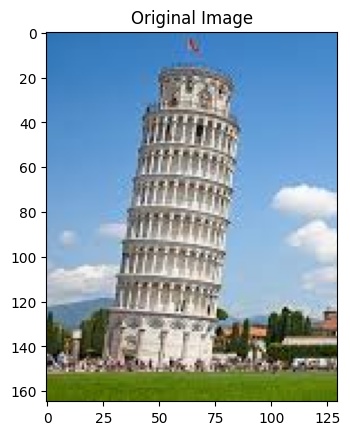

In [44]:
img = cv2.imread('pisa.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[0: ,40:170]
plt.imshow(img)
plt.title('Original Image')

Text(0.5, 1.0, 'Original Image')

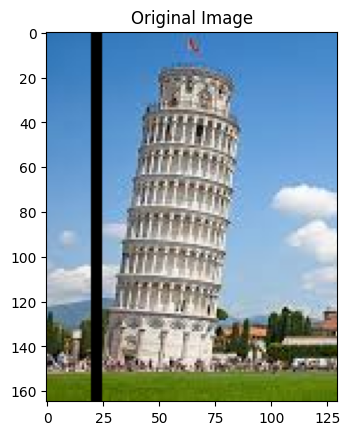

In [45]:
patch_img = img.copy()
patch_img[0:, 20:25] = 0
plt.imshow(patch_img)
plt.title('Original Image')

In [46]:
#Centre of the image
height, width, _ = img.shape
xc, yc = height/2, width/2

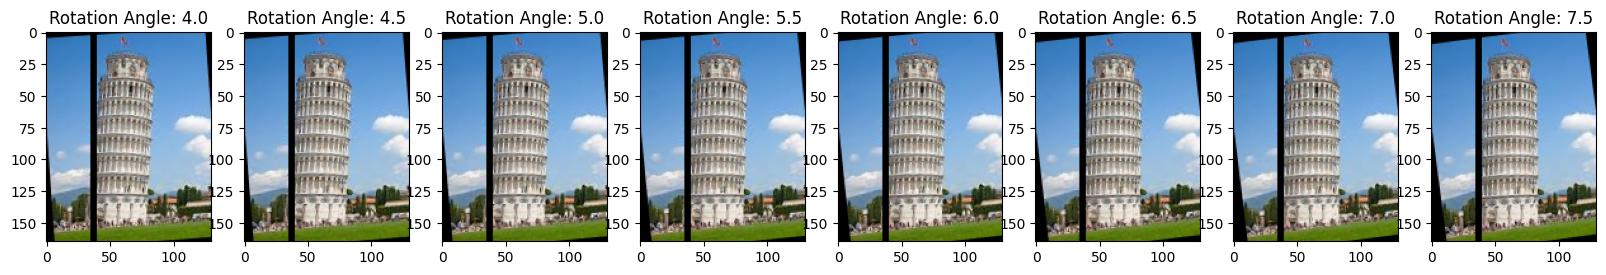

In [67]:
val = 181
plt.figure(figsize=(20, 20))
for i in np.arange(4, 8, 0.5):
    rot_matrix = cv2.getRotationMatrix2D((xc, yc), i, 1)
    rotated_img = cv2.warpAffine(img, rot_matrix, (width, height))
    resized_img = cv2.resize(rotated_img, (width, height), interpolation=cv2.INTER_LINEAR)
    patch_img = resized_img.copy()
    patch_img[0:, 35:40] = 0
    plt.subplot(val)
    val += 1
    plt.imshow(patch_img)
    plt.title(f'Rotation Angle: {i}')

In the above rotations the tower looks straight for rotation angle values 7 and 7.5. So the inclination angle might be somewhere in between 7 and 7.5

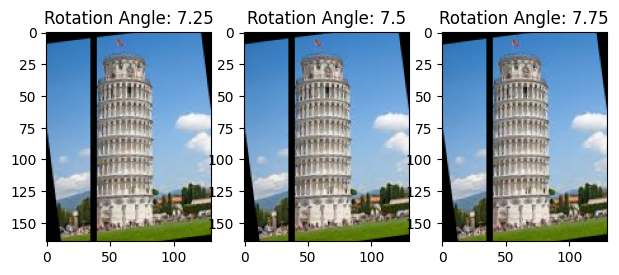

In [68]:
val = 181
plt.figure(figsize=(20, 20))
for i in np.arange(7.25, 8, 0.25):
    rot_matrix = cv2.getRotationMatrix2D((xc, yc), i, 1)
    rotated_img = cv2.warpAffine(img, rot_matrix, (width, height))
    resized_img = cv2.resize(rotated_img, (width, height), interpolation=cv2.INTER_LINEAR)
    resized_img[0:, 35:40] = 0
    plt.subplot(val)
    val += 1
    plt.imshow(resized_img)
    plt.title(f'Rotation Angle: {i}')

In [56]:
def rotate_image(img, angle):

    img_array = np.array(img)

    h, w = img_array.shape[:2]
    
    angle_rad = np.radians(angle)
    
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    
    new_w = int(abs(w * cos_a) + abs(h * sin_a))
    new_h = int(abs(w * sin_a) + abs(h * cos_a))
    
    rotated_img_array = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    center_x, center_y = w // 2, h // 2
    new_center_x, new_center_y = new_w // 2, new_h // 2

    for y_new in range(new_h):
        for x_new in range(new_w):
            x_old = int((x_new - new_center_x) * cos_a + (y_new - new_center_y) * sin_a + center_x)
            y_old = int(-(x_new - new_center_x) * sin_a + (y_new - new_center_y) * cos_a + center_y)
            
            if 0 <= x_old < w and 0 <= y_old < h:
                rotated_img_array[y_new, x_new] = img_array[y_old, x_old]

    
    return rotated_img_array


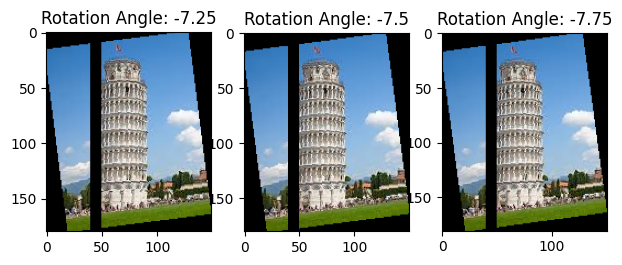

In [65]:
val = 181
plt.figure(figsize=(20, 20))
for i in np.arange(-7.25, -8, -0.25):
    rotated_img = rotate_image(img, i)
    rotated_img[0:, 40:50] = 0
    plt.subplot(val)
    val += 1
    plt.imshow(rotated_img)
    plt.title(f'Rotation Angle: {i}')

The angle of inclination is approximately 7.5 degrees